In [24]:
#by Joh Schoeneberg 2020
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

import skimage
import skimage.external.tifffile

import os

import pandas as pd
import seaborn as sns

In [25]:

import sys
import argparse

#default_i = "../data/PositiveControl/FilamentProjections/TomoJune_Fil06_Projection_crop.tif"
default_i = "../data/PositiveControl/FilamentProjections_readyToProcess/"
default_refPlus = "../data/ReferenceImageStacks/PlusUp.tif"
default_refMinus = "../data/ReferenceImageStacks/MinusUp.tif"
default_o = "../output/"

# this is the default system argument value array. Uncomment to run independent of command line
sys.argv = ['actinPolarity.py','-i',default_i,'-refPlus',default_refPlus,'-refMinus',default_refMinus,'-o',default_o]


parser = argparse.ArgumentParser(description='ActinPolarity by Joh Schoeneberg 2020')

parser.add_argument('-i','--input', help='*.tif input filament or folder. If folder: process all *.tif in folder.', default=default_i, required=True)
parser.add_argument('-refPlus','--referencePlusUp', help='*.tif stack plusUp reference',default=default_refPlus, required=True)
parser.add_argument('-refMinus','--referenceMinusUp', help='*.tif stack minusUp reference',default=default_refMinus, required=True)
parser.add_argument('-o','--output', help='output folder path ./output/',default=default_o, required=True)
args = vars(parser.parse_args())



#parser.add_argument('-i', metavar='N', type=int, nargs='+',
#                   help='input filament.tif')
#parser.add_argument('--sum', dest='accumulate', action='store_const',
#                   const=sum, default=max,
#                   help='sum the integers (default: find the max)')


#args = vars(parser.parse_args())
#print(args)


In [26]:

#zoom call timestamp 19:00
width = 23;
height = 69;
every = 5;

#import mask
input_image_path = os.path.abspath(os.path.join(args['input']))
input_imagePaths = []
if (os.path.isfile(input_image_path) ):
    input_imagePaths.append(input_image_path)
if(os.path.isdir(input_image_path)):
    for file in os.listdir(input_image_path):
        if (file.endswith(".tif")):
            input_imagePaths.append(os.path.join(input_image_path, file))



PlusUp_image_path = os.path.abspath(os.path.join(args['referencePlusUp']))
MinusUp_image_path = os.path.abspath(os.path.join(args['referenceMinusUp']))

output_folder_path = os.path.abspath(os.path.join(args['output']))
#create folder if it does not exist
from pathlib import Path
Path(output_folder_path).mkdir(parents=True, exist_ok=True)


minusUpReference = skimage.external.tifffile.imread(MinusUp_image_path)
#print(image.shape)
#plt.imshow(minusUpReference[0],cmap='gray')
#plt.show()

plusUpReference = skimage.external.tifffile.imread(PlusUp_image_path)
#print(image.shape)
#plt.imshow(plusUpReference[0],cmap='gray')
#plt.show()

In [27]:
# calculate correlation coefficient:
# from https://www.gcsca.net/IJ/Image_CorrelationJ_1o.java

def getR(d1, d2):
    d1 = np.array(d1).flatten()
    d2 = np.array(d2).flatten()
    t1 = 0
    t2 = 0
    sumValue = 0
    xMean = np.mean(d1)
    yMean = np.mean(d2)
    xStd = np.std(d1)
    yStd = np.std(d2)

    for i in range(0,len(d1)):
        t1 = (d1[i]-xMean)/xStd
        t2 = (d2[i]-yMean)/yStd
        sumValue = sumValue + (t1*t2)
    r = sumValue/(len(d1)-1)
    return(r)

found 10 images in path. Get on it!...
process /Users/johannesschoeneberg/git/JohSchoeneberg/actinPolarity/data/PositiveControl/FilamentProjections_readyToProcess/TomoJune_Fil03_Projection_crop.tif ...
extracting subimages of shape (w,h) (23,69) every 5 pixel ...
found 6 subpictures
calculating R values...
     R_plusUpReference  R_plusUpReference_area  R_minusUpReference  \
0             0.421609               85.608742            0.492873   
1             0.403469               85.608742            0.485630   
2             0.401736               85.608742            0.474037   
3             0.394411               85.608742            0.462338   
4             0.382022               85.608742            0.443674   
..                 ...                     ...                 ...   
217           0.407227               85.608742            0.448084   
218           0.425254               85.608742            0.459572   
219           0.447607               85.608742            0.47

actinPolarity.py:123: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


      R_plusUpReference  R_plusUpReference_area  R_minusUpReference  \
0              0.366522              550.842827            0.363394   
1              0.350857              550.842827            0.360371   
2              0.333067              550.842827            0.364246   
3              0.313352              550.842827            0.365598   
4              0.291067              550.842827            0.362246   
...                 ...                     ...                 ...   
1179           0.578847              550.842827            0.374641   
1180           0.578970              550.842827            0.396301   
1181           0.580319              550.842827            0.418962   
1182           0.574984              550.842827            0.440552   
1183           0.572167              550.842827            0.455672   

      R_minusUpReference_area R_Plus_minus_R-Minus:  
0                  452.317188           Plus End Up  
1                  452.317188          

actinPolarity.py:81: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
actinPolarity.py:101: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
actinPolarity.py:123: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


     R_plusUpReference  R_plusUpReference_area  R_minusUpReference  \
0             0.538799              323.852208            0.624297   
1             0.540244              323.852208            0.623962   
2             0.549055              323.852208            0.628053   
3             0.550074              323.852208            0.626400   
4             0.550406              323.852208            0.620217   
..                 ...                     ...                 ...   
735           0.583954              323.852208            0.440515   
736           0.600750              323.852208            0.452533   
737           0.615716              323.852208            0.464507   
738           0.627042              323.852208            0.471874   
739           0.642444              323.852208            0.485976   

     R_minusUpReference_area R_Plus_minus_R-Minus:  
0                 266.887848           Plus End Up  
1                 266.887848           Plus End Up  


actinPolarity.py:81: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
actinPolarity.py:101: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
actinPolarity.py:123: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


     R_plusUpReference  R_plusUpReference_area  R_minusUpReference  \
0             0.521160               153.13862            0.517791   
1             0.504195               153.13862            0.519254   
2             0.491321               153.13862            0.532978   
3             0.476502               153.13862            0.540489   
4             0.458907               153.13862            0.541531   
..                 ...                     ...                 ...   
402           0.428263               153.13862            0.536954   
403           0.446079               153.13862            0.548902   
404           0.465639               153.13862            0.564943   
405           0.479558               153.13862            0.570294   
406           0.509043               153.13862            0.594807   

     R_minusUpReference_area R_Plus_minus_R-Minus:  
0                 224.673375          Minus End Up  
1                 224.673375          Minus End Up  


actinPolarity.py:81: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
actinPolarity.py:101: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
actinPolarity.py:123: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


      R_plusUpReference  R_plusUpReference_area  R_minusUpReference  \
0              0.407113              342.751021            0.480706   
1              0.388211              342.751021            0.472920   
2              0.374955              342.751021            0.461714   
3              0.356954              342.751021            0.447578   
4              0.337957              342.751021            0.428084   
...                 ...                     ...                 ...   
1031           0.468533              342.751021            0.572998   
1032           0.483800              342.751021            0.595343   
1033           0.502250              342.751021            0.616791   
1034           0.516060              342.751021            0.636994   
1035           0.534237              342.751021            0.651578   

      R_minusUpReference_area R_Plus_minus_R-Minus:  
0                  540.286835          Minus End Up  
1                  540.286835          

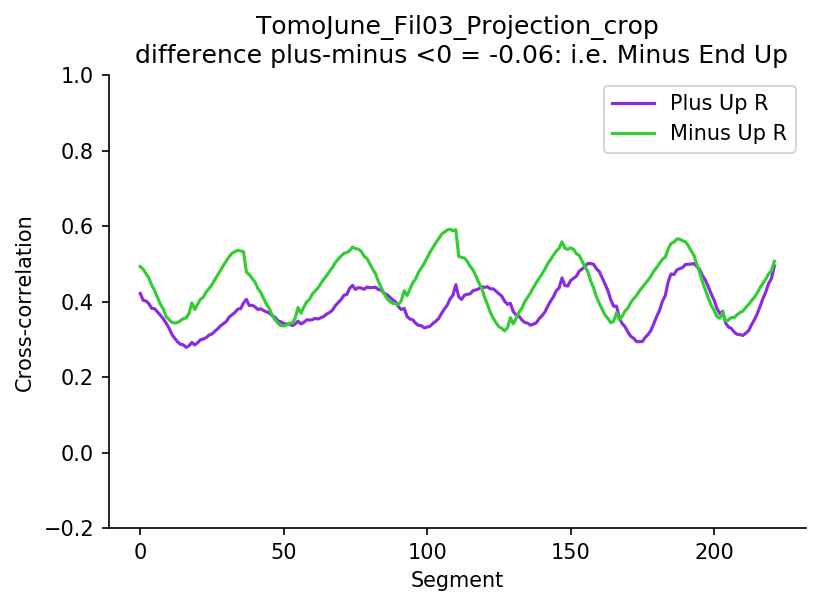

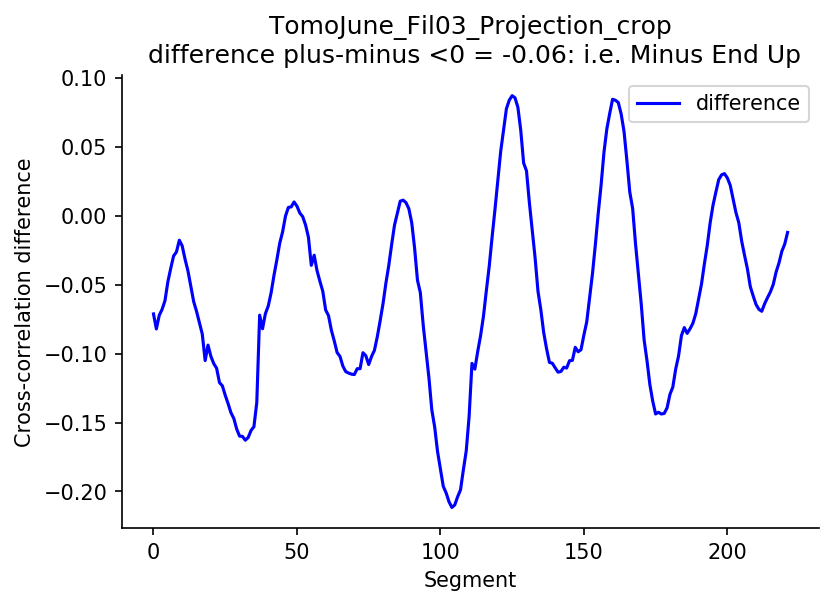

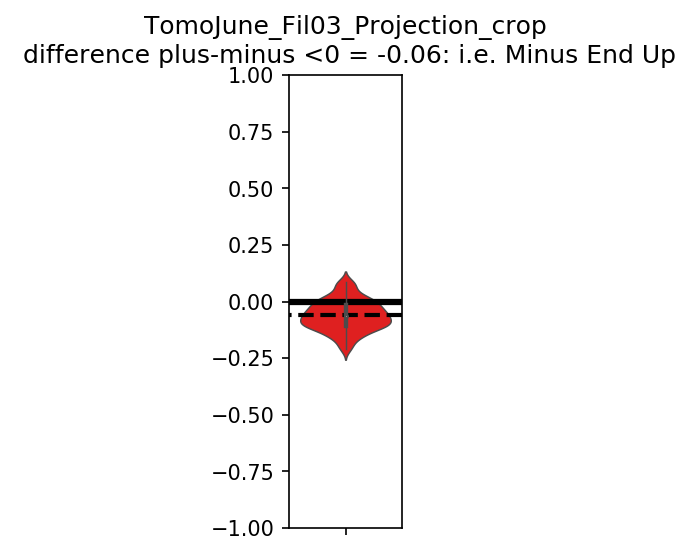

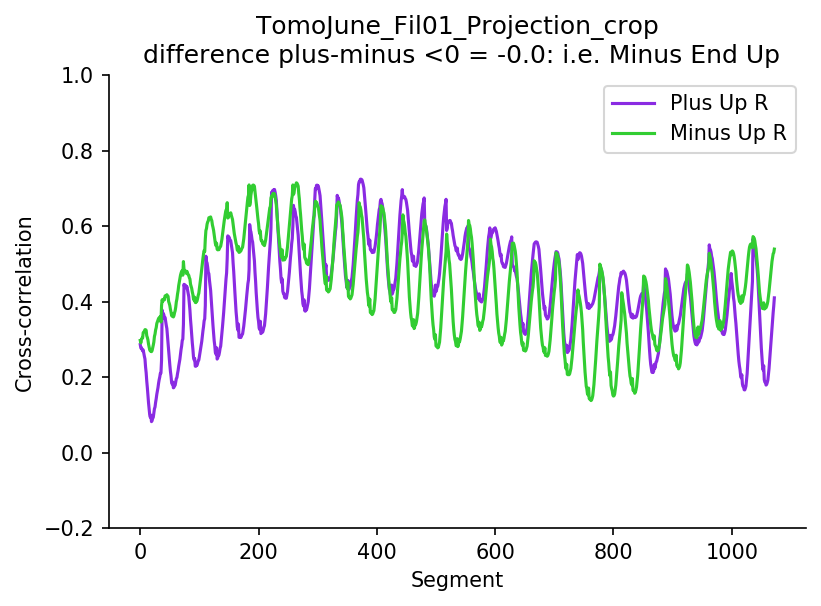

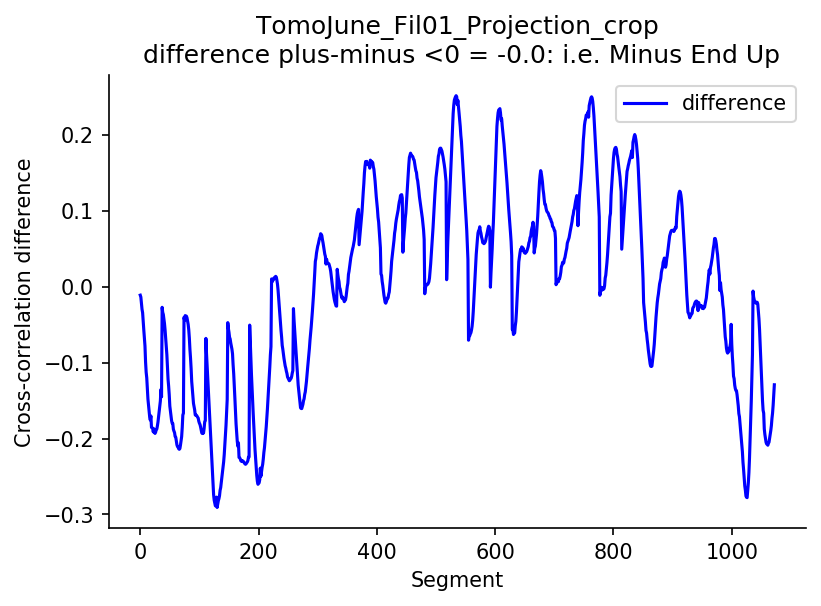

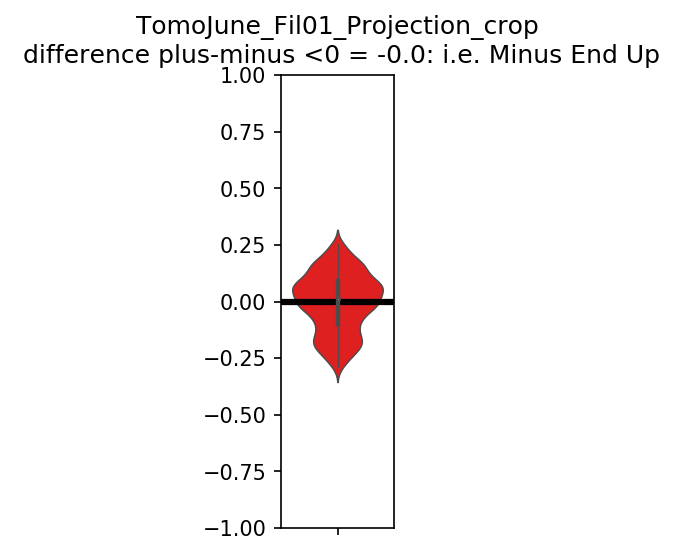

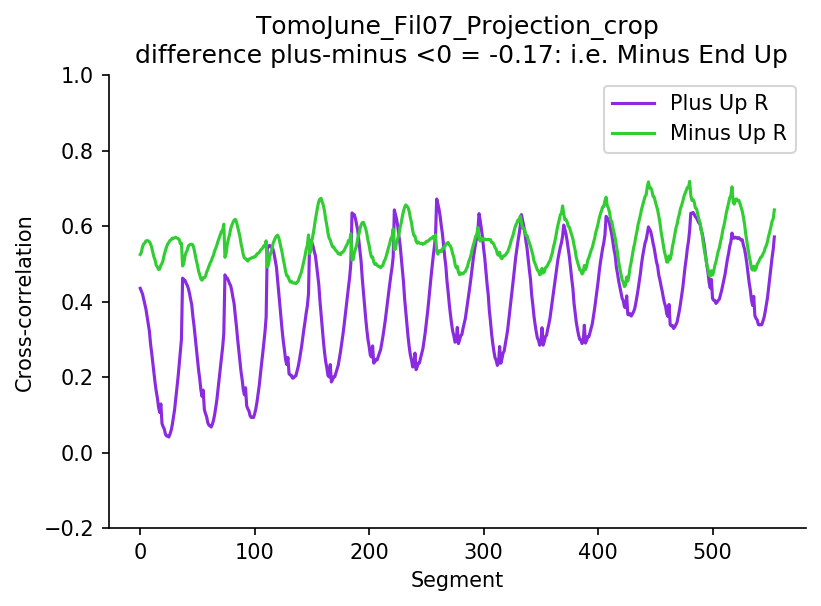

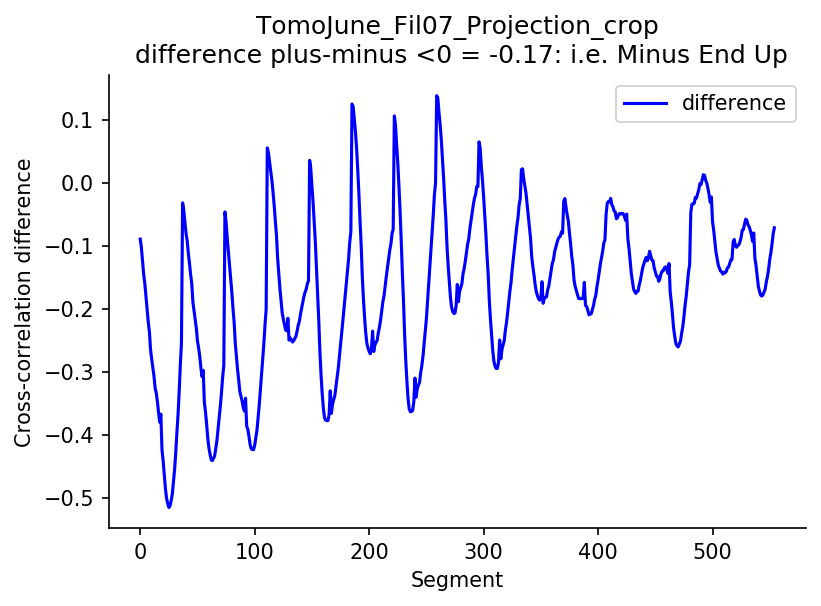

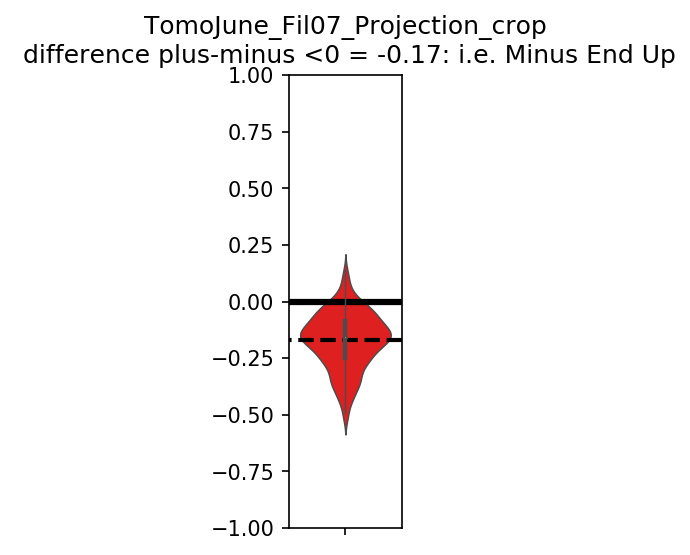

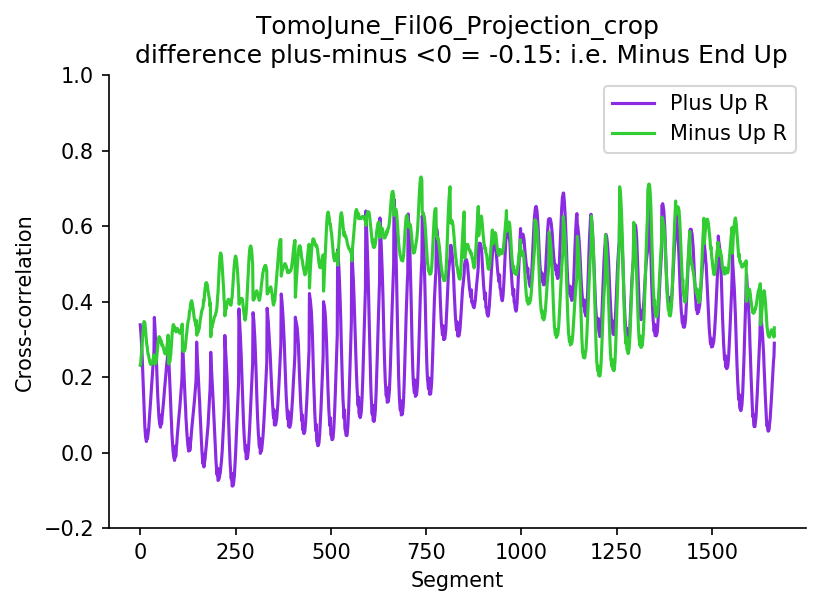

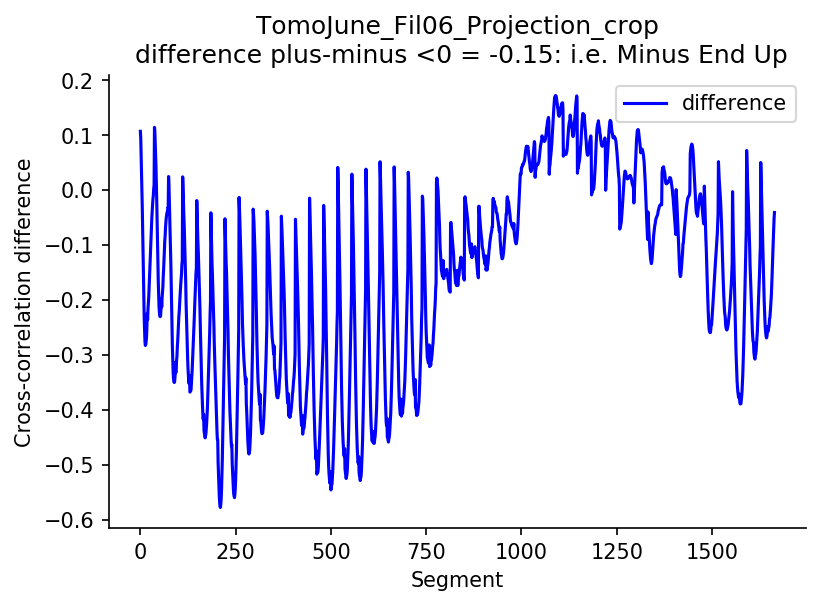

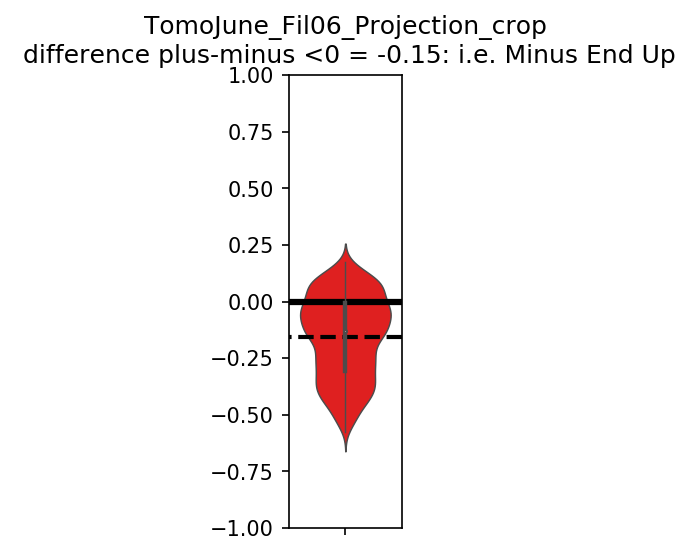

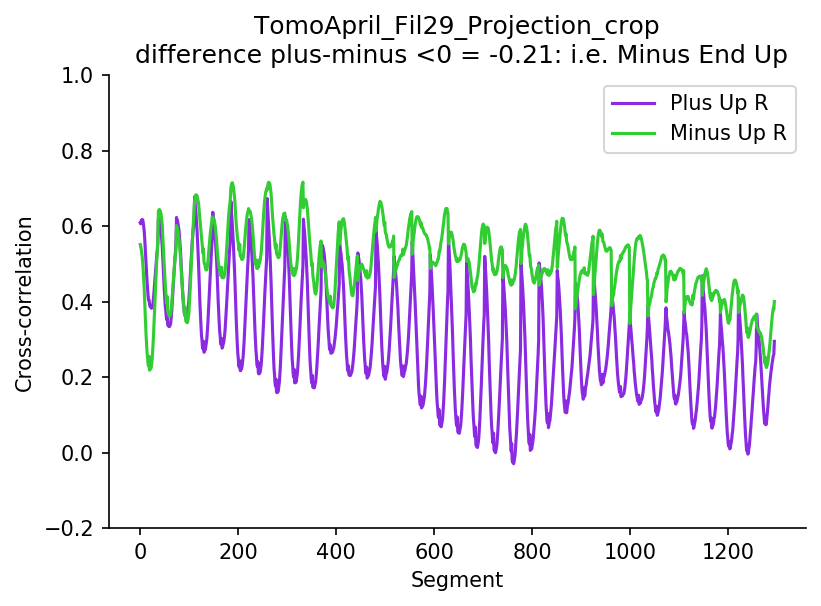

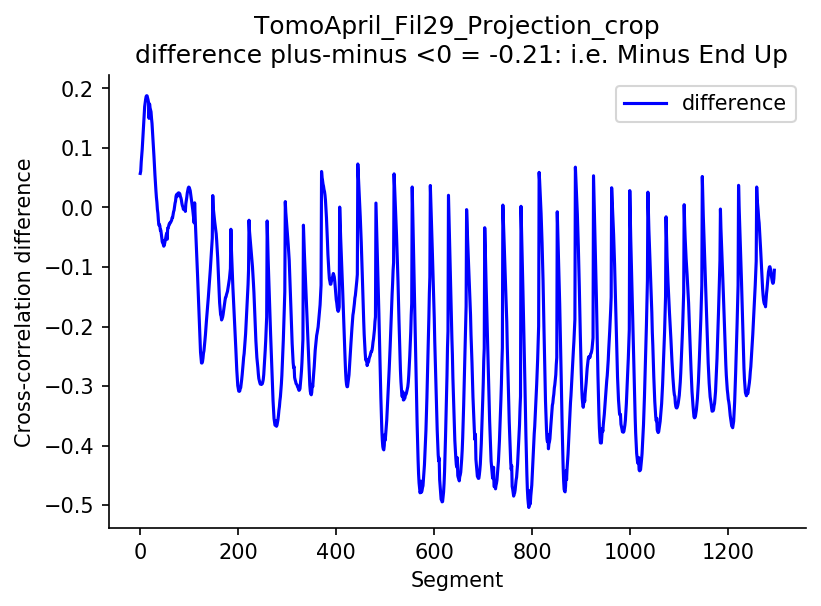

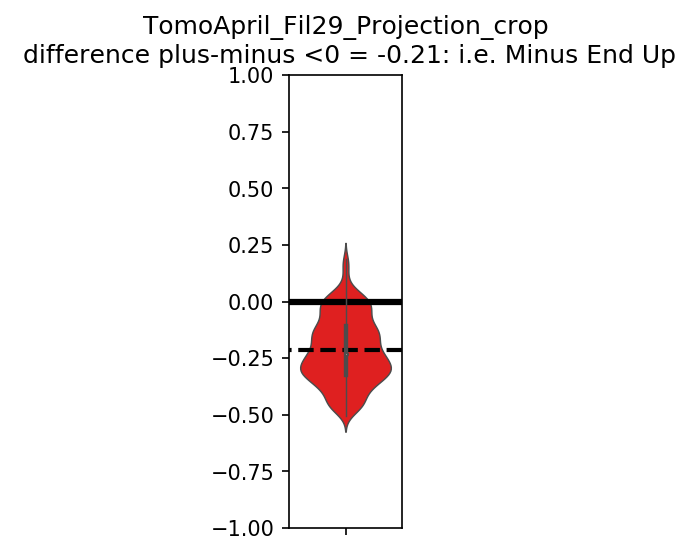

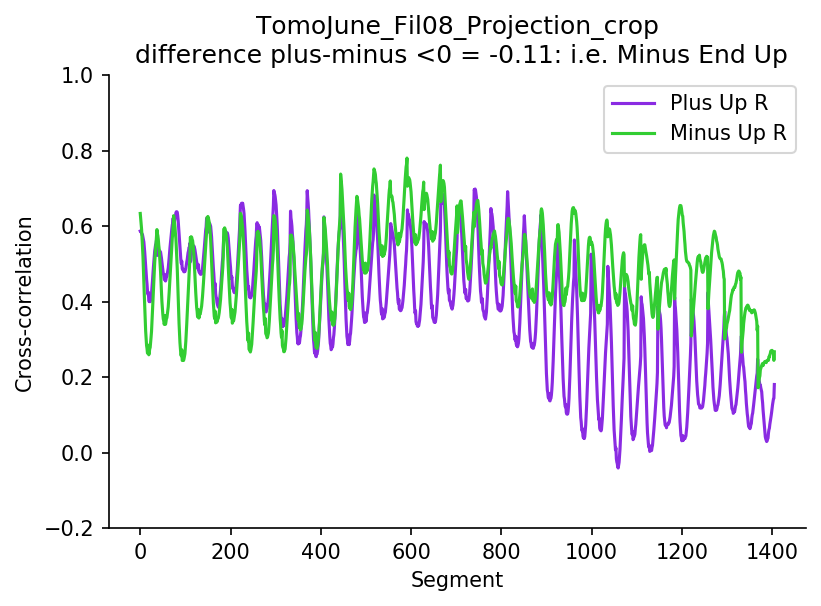

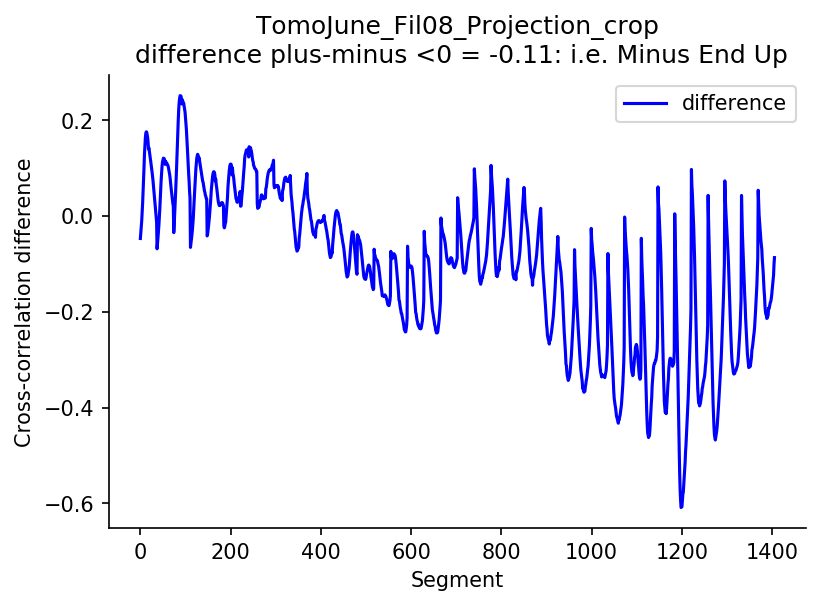

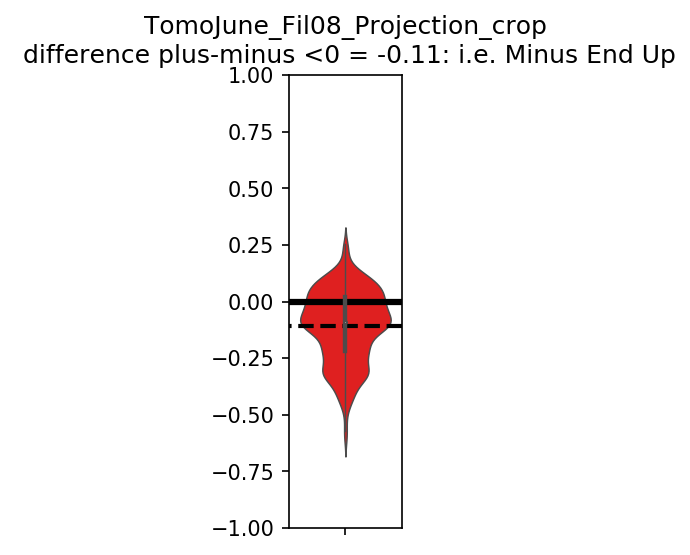

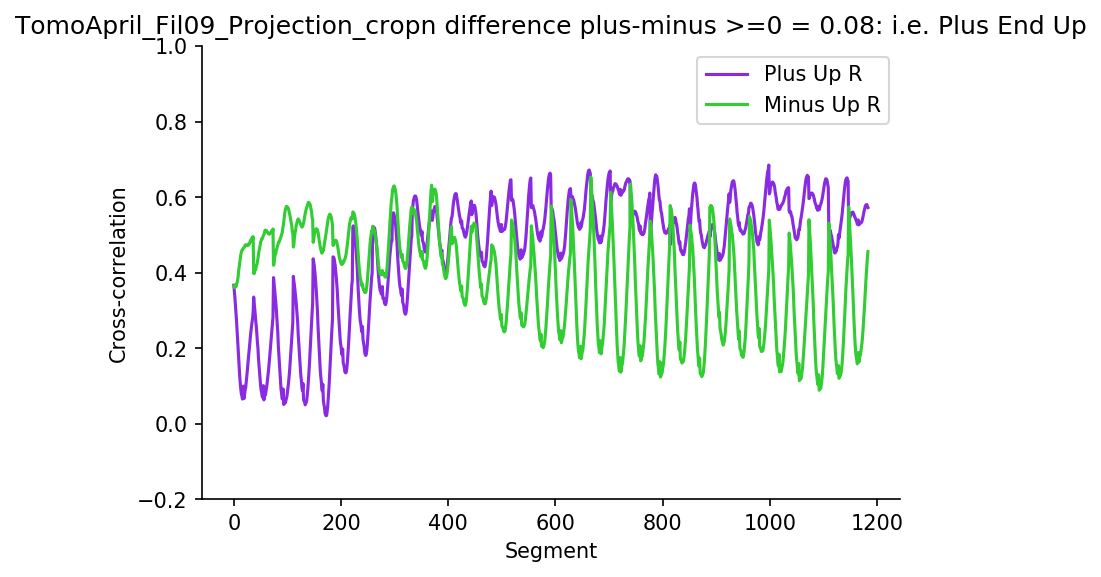

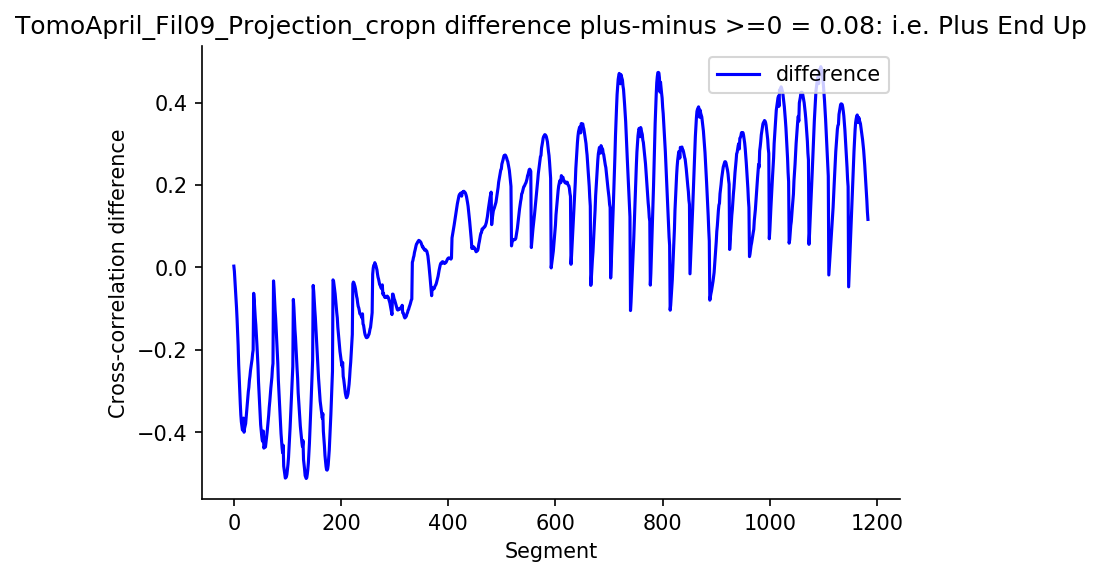

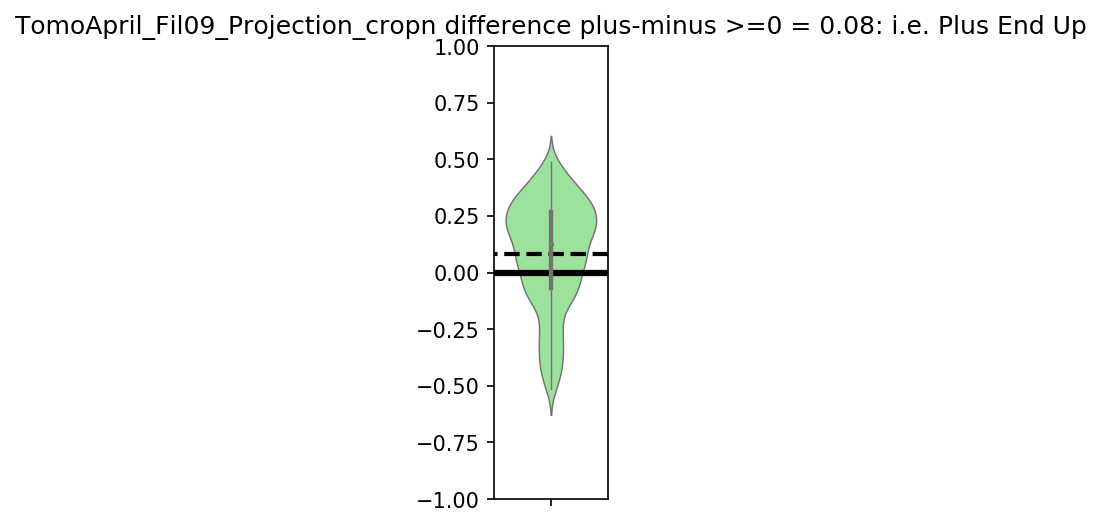

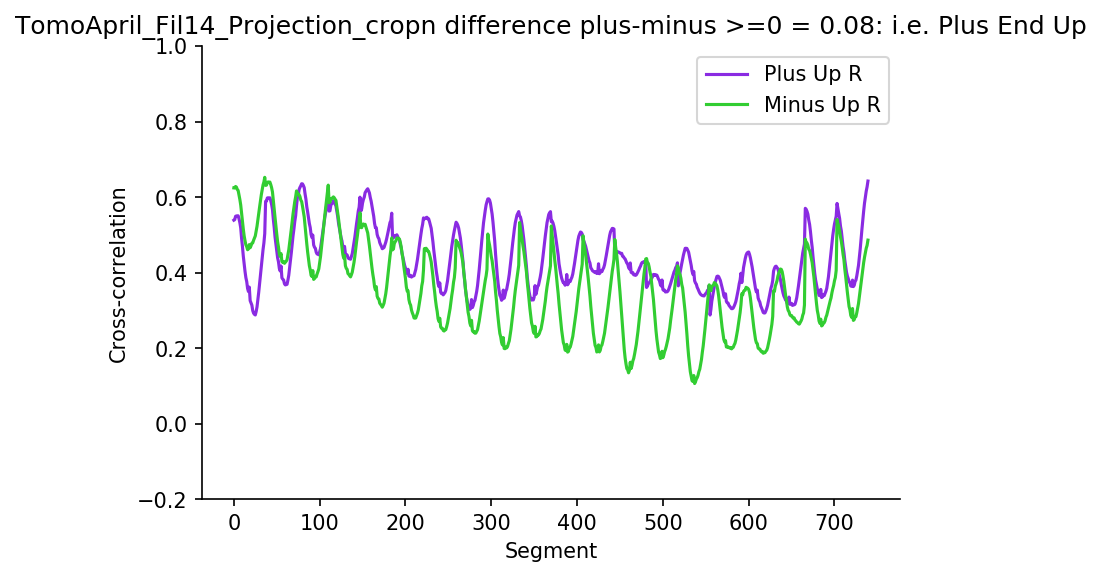

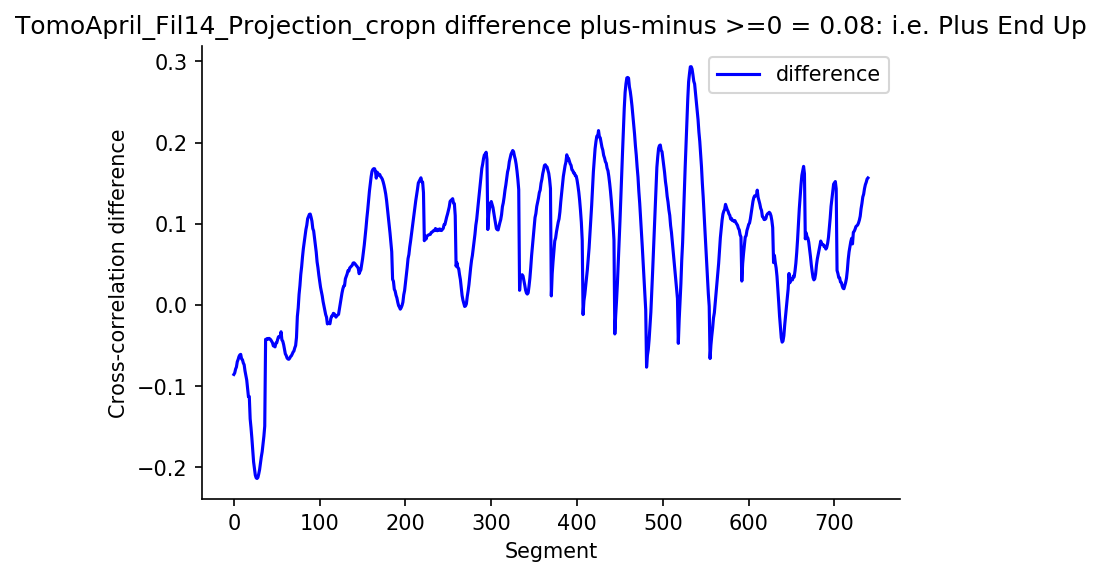

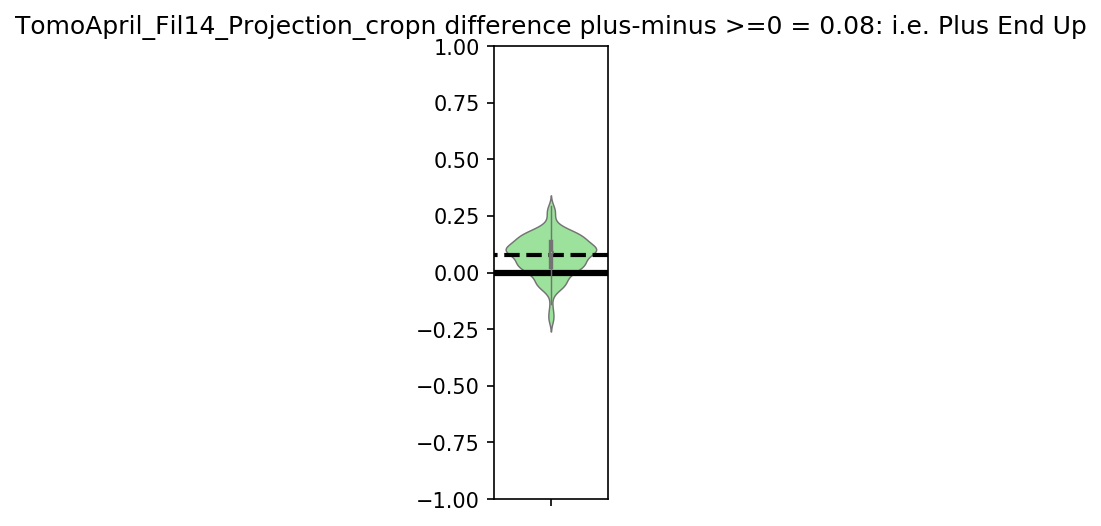

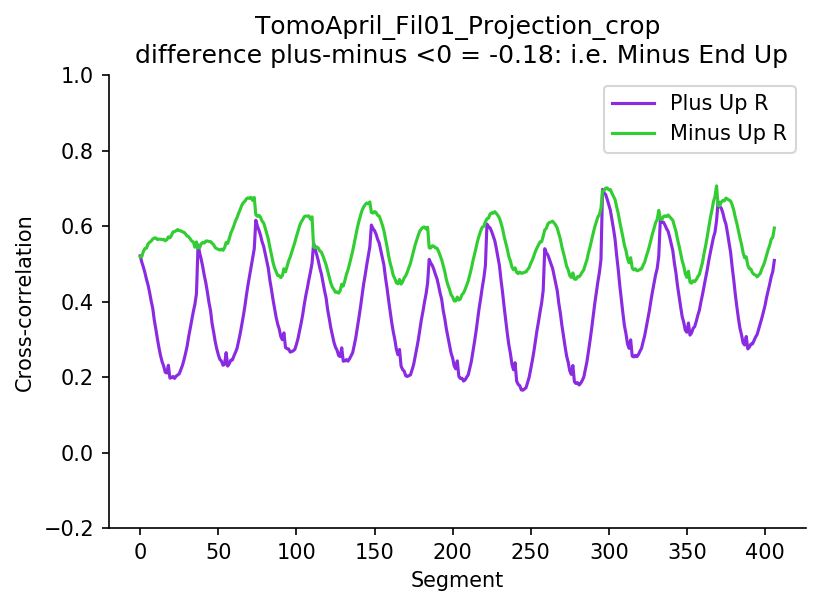

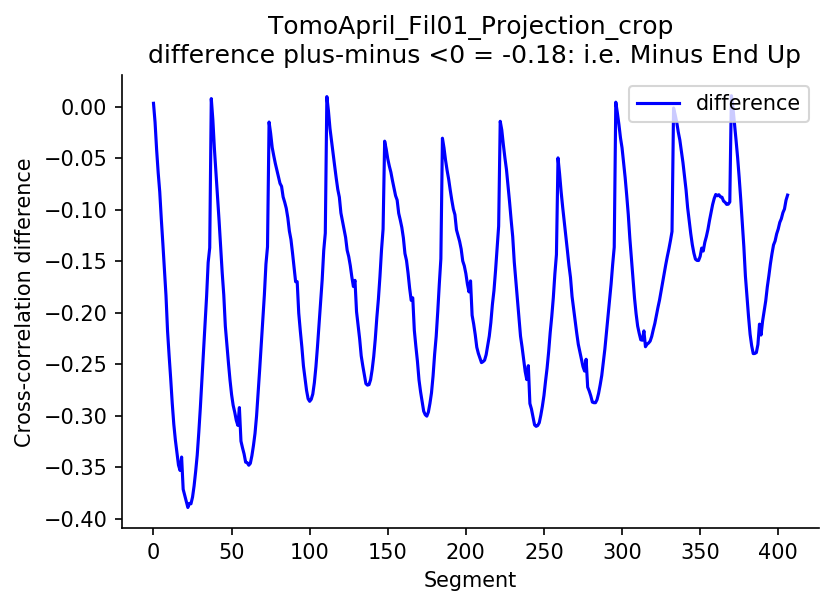

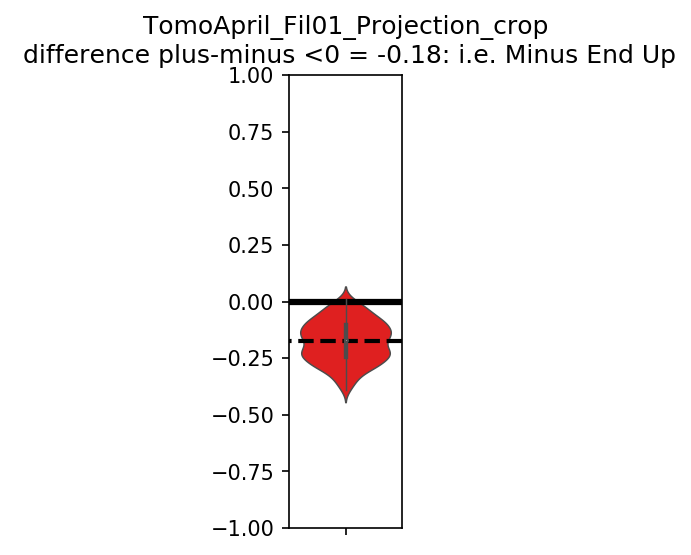

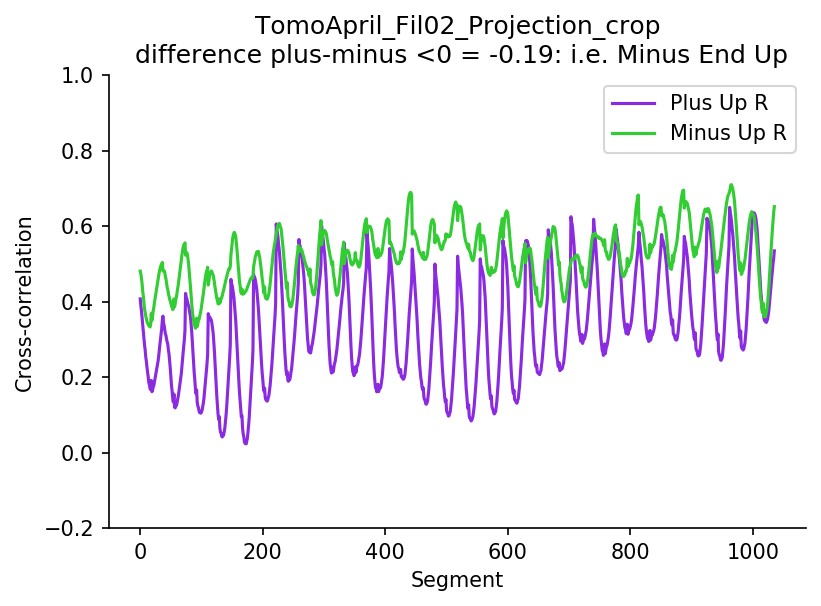

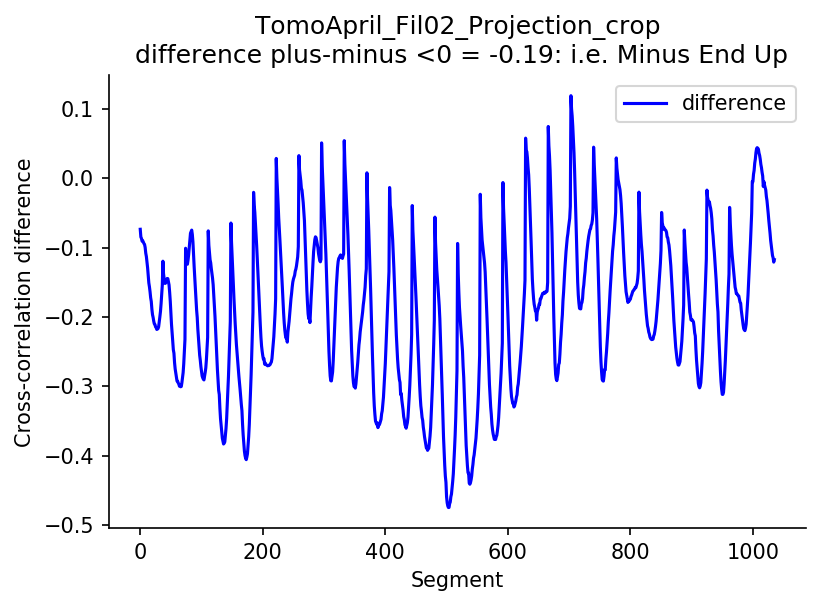

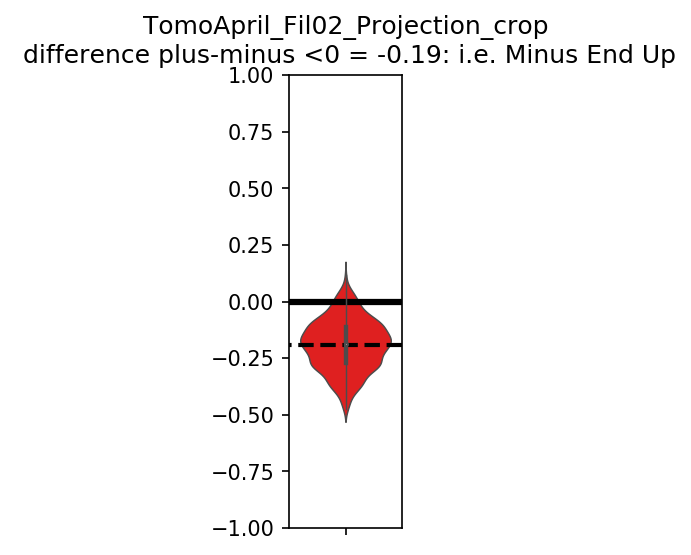

In [28]:
from pathlib import Path

print("found {} images in path. Get on it!...".format(len(input_imagePaths)))

for input_image_path in input_imagePaths:


    print("process "+input_image_path+" ...")
    outputFilePrefix = Path(input_image_path).stem
    
    #print(outputFilePrefix)
    
    #continue

    image = skimage.external.tifffile.imread(input_image_path)
    globalMin = np.min(image)
    globalMax = np.max(image)

    
    print("extracting subimages of shape (w,h) ({},{}) every {} pixel ...".format(width,height,every))
    
    totalHeight = image.shape[0]
    #print(totalHeight);
    nSubpictures = (np.floor(((totalHeight-height)/every))).astype(int)
    subpictures = []
    
    Path(output_folder_path+"/"+outputFilePrefix).mkdir(parents=True, exist_ok=True)

    for i in range(nSubpictures,0,-1):
        #print(i)
        subpicture = image[i*every:height+i*every,:]
    

        skimage.external.tifffile.imsave(output_folder_path+"/"+outputFilePrefix+"/"+outputFilePrefix+"_"+str(i).zfill(5)+".tiff", subpicture, imagej=True );
    
    #    plt.imshow(subpicture,cmap='gray')
    #    plt.show()
        subpictures.append(subpicture)
    
    print("found {} subpictures".format(len(subpictures)))
    #print("--- %s seconds ---" % (time.time() - start_time))
    
    
    ####################################################################################
    
    #import time
    #start_time = time.time()
    print("calculating R values...")
    
    rValuesPlusUpReference = []
    rValuesMinusUpReference = []
    
    for i in range(0,len(subpictures)):
        for j in range(0,len(plusUpReference)):
            rpu = getR(plusUpReference[j],subpictures[i])
            rValuesPlusUpReference.append(rpu)
        for k in range(0,len(minusUpReference)):
            rmu = getR(minusUpReference[k],subpictures[i])
            rValuesMinusUpReference.append(rmu)
    
    #print("--- %s seconds ---" % (time.time() - start_time))
    
    ####################################################################################
    
    #https://matplotlib.org/3.1.0/gallery/color/named_colors.html
    
    
    avgDifference = np.round(np.mean(np.array(rValuesPlusUpReference)-np.array(rValuesMinusUpReference)),decimals=2)
    pltTitleExplanation = ""
    if(np.mean(np.array(rValuesPlusUpReference)-np.array(rValuesMinusUpReference))<0):
        pltTitleExplanation = outputFilePrefix+"\n difference plus-minus <0 = {}: i.e. Minus End Up".format(avgDifference)
        endUpDecision = "Minus End Up"
    else:
        pltTitleExplanation = outputFilePrefix+"n difference plus-minus >=0 = {}: i.e. Plus End Up".format(avgDifference)
        endUpDecision = "Plus End Up"
        
        
    ####
    
    
    plt.figure(dpi=150)
    plt.plot(rValuesPlusUpReference,c="blueviolet",label="Plus Up R")
    plt.plot(rValuesMinusUpReference,c="limegreen",label="Minus Up R")
    plt.xlabel("Segment")
    plt.ylabel("Cross-correlation")
    # Hide the right and top spines
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.legend(loc="upper right")
    plt.ylim(-0.2,1)
    plt.title(pltTitleExplanation)
    plt.savefig(output_folder_path+"/"+outputFilePrefix+'_plot.svg')
    plt.savefig(output_folder_path+"/"+outputFilePrefix+'_plot.png')
    
    
    ####################################################################################
    
    
    #https://matplotlib.org/3.1.0/gallery/color/named_colors.html
    
    plt.figure(dpi=150)
    plt.plot(np.array(rValuesPlusUpReference)-np.array(rValuesMinusUpReference),c="blue",label="difference")
    plt.xlabel("Segment")
    plt.ylabel("Cross-correlation difference")
    # Hide the right and top spines
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.legend(loc="upper right")
    #plt.ylim(-0.5,0.5)
    
    
        
    plt.title(pltTitleExplanation)
    plt.savefig(output_folder_path+"/"+outputFilePrefix+'_plot_difference.svg')
    plt.savefig(output_folder_path+"/"+outputFilePrefix+'_plot_difference.png')
    
    
    
    
    ####################################################################################


    plt.figure(dpi=150)
    plt.plot([-1, 1], [0, 0], 'k-', lw=3)
    
    differencesPlusUpMinusMinusUp = np.array(rValuesPlusUpReference)-np.array(rValuesMinusUpReference)
    dataToPlot = np.array(differencesPlusUpMinusMinusUp.flatten())
    
    if(np.mean(dataToPlot)<0):
        colorUsed = "red"
    else:
        colorUsed = "lightgreen"
    plt.plot([-1, 1], [np.mean(dataToPlot), np.mean(dataToPlot)], 'k--', lw=2)
       
    swarmPlot = sns.violinplot(y=dataToPlot,color=colorUsed,edgecolor="black",s=3,linewidth=0.7)
    swarmPlot.set(ylim=(-1, 1))
    swarmPlot.set(aspect=2)
    plt.title(pltTitleExplanation)
    plt.savefig(output_folder_path+"/"+outputFilePrefix+'_plot_difference_violin.svg')
    plt.savefig(output_folder_path+"/"+outputFilePrefix+'_plot_difference_violin.png')
    
    ####################################################################################
    
    
    data = np.array([rValuesPlusUpReference, rValuesMinusUpReference])
    #print( data.shape)
    df = pd.DataFrame({'R_plusUpReference': data[0], 
                       'R_plusUpReference_area': np.sum(np.abs(data[0])), 
                       'R_minusUpReference': data[1], 
                       'R_minusUpReference_area': np.sum(np.abs(data[1])),
                       'R_Plus_minus_R-Minus:':avgDifference,
                       'R_Plus_minus_R-Minus:':endUpDecision})
    print(df)
    df.to_csv(output_folder_path+"/"+outputFilePrefix+'_output.csv', index = True)
    
    
    
    ####################################################################################
    

print("done.")
print("find the outputs in "+output_folder_path)